In [1]:
#Create a chart similar to examples/Figure_1.png, 
#where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and
#smoke variables for patients with cardio=1 and cardio=0 in different panels.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('medical_examination.csv')

In [4]:
print(df)


          id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393    2     168    62.0    110     80            1     1   
1          1  20228    1     156    85.0    140     90            3     1   
2          2  18857    1     165    64.0    130     70            3     1   
3          3  17623    2     169    82.0    150    100            1     1   
4          4  17474    1     156    56.0    100     60            1     1   
...      ...    ...  ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240    2     168    76.0    120     80            1     1   
69996  99995  22601    1     158   126.0    140     90            2     2   
69997  99996  19066    2     183   105.0    180     90            3     1   
69998  99998  22431    1     163    72.0    135     80            1     2   
69999  99999  20540    1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1

In [2]:
#Add an overweight column to the data. 
#To determine if a person is overweight, first calculate their BMI by dividing their weight
#in kilograms by the square of their height in meters. 
#If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [5]:
BMI = df['weight']/ np.square(df['height']/100)

In [7]:
df['overweight'] = (BMI > 25).astype('uint8')

In [ ]:
print(df['overweight'])

In [3]:
#Normalize the data by making 0 always good and 1 always bad. 
#If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
#Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's 
#catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. 
#The chart should look like examples/Figure_1.png.

In [11]:
df['gluc']= (df['gluc']!= 1).astype('uint8')
df['cholesterol']=(df['cholesterol'] != 1).astype('uint8')

In [22]:
columns = ['active', 'alco','cholesterol','gluc','overweight','smoke']
df_cat = pd.melt(df, id_vars = ["cardio"], value_vars = columns)
print(df_cat)

        cardio variable  value
0            0   active      1
1            1   active      1
2            1   active      0
3            1   active      1
4            0   active      0
...        ...      ...    ...
419995       0    smoke      1
419996       1    smoke      0
419997       1    smoke      0
419998       1    smoke      0
419999       0    smoke      0

[420000 rows x 3 columns]


In [27]:
df_cat = df_cat.reset_index()\
.groupby(['variable','cardio','value'])\
.agg('count')\
.rename(columns = {'index':'total'})\
.reset_index()

In [ ]:
#draw the catplot with sn.catplot()

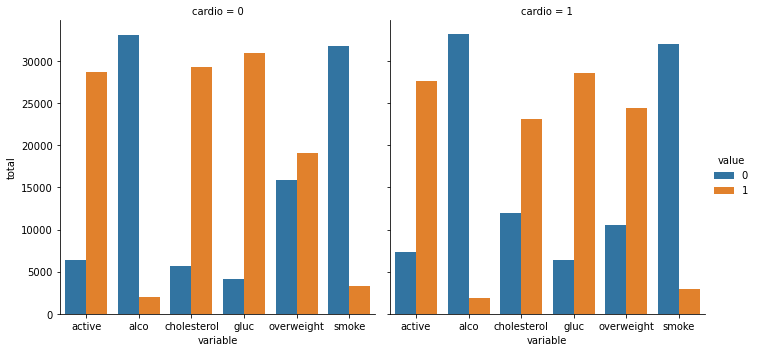

In [28]:
fig = sns.catplot(x="variable",y="total",col="cardio",hue= "value", data = df_cat, kind="bar").fig

In [4]:
#Clean the data. Filter out the following patient segments that represent incorrect data:
#diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
#height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
#height is more than the 97.5th percentile
#weight is less than the 2.5th percentile
#weight is more than the 97.5th percentile

In [30]:
df_heat = df[
    (df['ap_lo'] <= df['ap_hi'])
             & (df['height'] >= df['height'].quantile(0.025))
             & (df['height'] <= df['height'].quantile(0.975))
            &(df['weight'] >= df['weight'].quantile(0.025))
            & (df['weight'] >= df['weight'].quantile(0.975))
]

In [5]:
#Create a correlation matrix using the dataset. Plot the correlation matrix using seaborn's heatmap().
#Mask the upper triangle. The chart should look like examples/Figure_2.png.

In [34]:
corr = df_heat.corr()

In [35]:
mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

In [36]:
fig2 = plt.figure(figsize =(12,6))

<Figure size 864x432 with 0 Axes>

In [ ]:
#draw the eatmap with sns.heatmap

<AxesSubplot:>

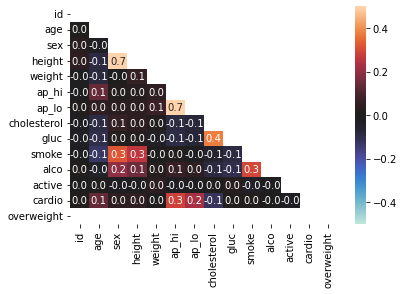

In [37]:
sns.heatmap(corr, mask=mask, annot =True,fmt ='.1f',center = 0,vmin= -0.5, vmax = 0.5)